In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist 

In [4]:
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()

In [5]:
data_shape = train_data.shape

print(f"There are {data_shape[0]} examples with shape ({data_shape[1]}, {data_shape[2]})")

There are 60000 examples with shape (28, 28)


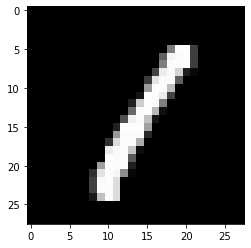

In [6]:
import matplotlib.pyplot as plt 
#showing a sample of data
plt.imshow(train_data[3],cmap="gray")
plt.show()

In [7]:
#processing data
train_data = train_data/255


### Implementing the model

In [9]:
#creating callback class to stop training when we reach the wanted accuracy
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get("accuracy") is not None and logs.get("accuracy") >0.99:
            print(f"\nReached accuracy of {logs.get('accuracy')}% so it is time to terminate!")
            self.model.stop_training = True 

In [10]:
#function implementation of the model
def create_and_train(train_data,train_labels,epochs):
    callbacks = myCallBack()

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(512,activation="relu"),
        tf.keras.layers.Dense(10,activation="softmax"),
    ])

    model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    model.fit(train_data,train_labels,epochs=epochs,callbacks=[callbacks])
    return model 


In [11]:
model = create_and_train(train_data,train_labels,10)

Epoch 1/10
1875/1875 [==============================] - 24s 11ms/step - loss: 0.2003 - accuracy: 0.9411
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0824 - accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0520 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0367 - accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0278 - accuracy: 0.9909


#### Putting our model to test :

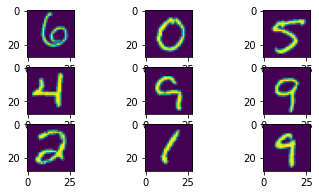

In [20]:
for i in range(100,109):
    plt.subplot(330+1+i)
    plt.imshow(test_data[i])
plt.show()

In [17]:
import numpy as np 
predictions = model.predict(test_data)

In [25]:
for i in range(100,109):
    print(np.argmax(predictions[i]),end="\t")
    if (109-i-1)%3 == 0:
        print()

6	0	5	
4	9	9	
2	1	9	
